In [74]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/data/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [75]:
# 2. 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [78]:
# 3. 시퀀스 데이터 생성 함수
def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

In [79]:
# 4. 시퀀스 길이 변경 (24개월)
window = 24
X, y = create_sequences(data_scaled, window)

In [80]:
# 5. 학습 / 테스트 분할 (80:20)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [81]:
# 7. LSTM 모델
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(window, 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [82]:
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, validation_split=0.1, epochs=200, batch_size=16, verbose=1)

Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0369 - val_loss: 0.0153
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0054 - val_loss: 0.0094
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0047 - val_loss: 0.0103
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0062 - val_loss: 0.0116
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0056 - val_loss: 0.0102
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044 - val_loss: 0.0090
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043 - val_loss: 0.0091
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0047 - val_loss: 0.0090
Epoch 9/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0045 - val_loss: 0.0138
Epoch 10/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0044 - val_loss: 0.0139
Epoch 11/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0054 - val_loss: 0.0127
Epoch 12/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step

In [83]:
# 8. LSTM 예측 및 역정규화
lstm_pred = lstm_model.predict(X_test)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
lstm_pred_rescaled = scaler.inverse_transform(lstm_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


In [84]:
# 9. LSTM 평가
lstm_rmse = np.sqrt(mean_squared_error(y_test_rescaled, lstm_pred_rescaled))
lstm_mae = mean_absolute_error(y_test_rescaled, lstm_pred_rescaled)
lstm_r2 = r2_score(y_test_rescaled, lstm_pred_rescaled)
lstm_mape = mean_absolute_percentage_error(y_test_rescaled, lstm_pred_rescaled)

print("\n📊 LSTM 성능")
print(f"RMSE: {lstm_rmse:.4f}, MAE: {lstm_mae:.4f}, R²: {lstm_r2:.4f}, MAPE: {lstm_mape:.4f}")


📊 LSTM 성능
RMSE: 1887.9886, MAE: 1531.2688, R²: -0.2929, MAPE: 0.1205


In [64]:
# RNN
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
# 5. 학습
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2148
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0018
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0010    
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.3343e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.4680e-04
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010    
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.8521e-04
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011

In [66]:
# 6. 예측
pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


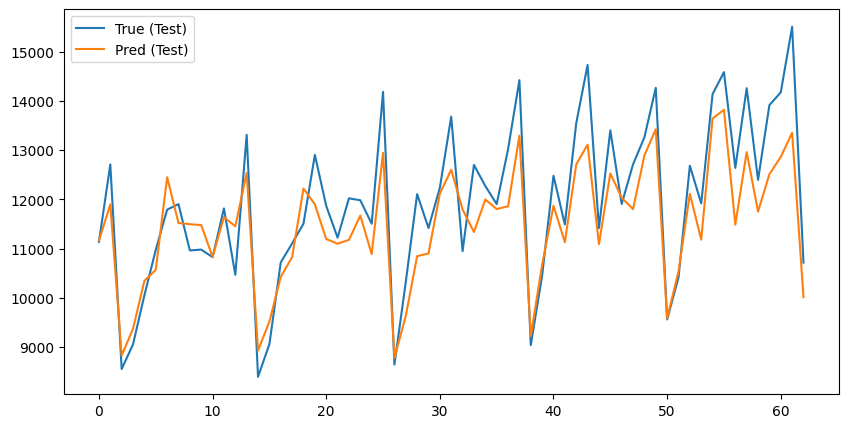

In [67]:
# 7. 시각화
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(y_test), label='True (Test)')
plt.plot(scaler.inverse_transform(pred), label='Pred (Test)')
plt.legend()
plt.show()

In [70]:
# RNN 예측 및 스케일 복원
pred_rnn = model.predict(X_test)
pred_rnn_rescaled = scaler.inverse_transform(pred_rnn)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [71]:
# RNN 성능 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    return 100 / len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

mse = mean_squared_error(y_test_rescaled, pred_rnn_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, pred_rnn_rescaled)
r2 = r2_score(y_test_rescaled, pred_rnn_rescaled)
mape = mean_absolute_percentage_error(y_test_rescaled, pred_rnn_rescaled)
smape_score = smape(y_test_rescaled, pred_rnn_rescaled)

print(f"RNN 성능")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"SMAPE: {smape_score:.2f}%")

RNN 성능
Mean Squared Error (MSE): 608346.8489
Root Mean Squared Error (RMSE): 779.9659
Mean Absolute Error (MAE): 643.1650
R^2 Score: 0.7738
MAPE: 5.17%
SMAPE: 5.30%
